In [79]:
# Import libries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier





In [80]:
# Import dataframes AND Specify a custom delimiter for the CSV input (sep=' ')

red_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-red.csv', sep=';')
white_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-white.csv',sep=';')

In [81]:
# Checking null values

red_df.isnull().sum()
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [82]:
red_df.head(15)
white_df.sort_values(['quality'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3307,9.4,0.24,0.29,8.5,0.037,124.0,208.0,0.99395,2.90,0.38,11.0,3
445,7.1,0.32,0.32,11.0,0.038,16.0,66.0,0.99370,3.24,0.40,11.5,3
2050,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.7,3
3810,6.8,0.26,0.34,15.1,0.060,42.0,162.0,0.99705,3.24,0.52,10.5,3
3409,6.2,0.23,0.35,0.7,0.051,24.0,111.0,0.99160,3.37,0.43,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9


In [83]:
#creating new column

red_df['quality_label']= red_df['quality'].apply(lambda value: 'low' 
if value <= 4 else 'medium'
if value <=7 else 'high')

white_df['quality_label']= white_df['quality'].apply(lambda value: 'low' 
if value <= 4 else 'medium'
if value <=7 else 'high')



In [84]:
# transforming these labels into categrical data type

red_df['quality_label'] = pd.Categorical(red_df['quality_label'],
categories=['low', 'medium', 'high'])

white_df['quality_label'] = pd.Categorical(white_df['quality_label'],
categories=['low', 'medium', 'high'])

In [85]:
# Combine the two datasets into wines.

red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

wines = pd.concat([red_df, white_df])

In [86]:
# Re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

wines


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,medium,red
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium,white
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,medium,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,medium,white
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,medium,white
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,medium,white
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,medium,white


In [87]:
comparative_df= pd.concat([red_df.describe(), white_df.describe()], axis='columns', keys=['Red Wine', 'White Wine'])

comparative_df.head()

Red Wine                                                            \
      fixed acidity volatile acidity  citric acid residual sugar    chlorides   
count   1599.000000      1599.000000  1599.000000    1599.000000  1599.000000   
mean       8.319637         0.527821     0.270976       2.538806     0.087467   
std        1.741096         0.179060     0.194801       1.409928     0.047065   
min        4.600000         0.120000     0.000000       0.900000     0.012000   
25%        7.100000         0.390000     0.090000       1.900000     0.070000   

                                                                          \
      free sulfur dioxide total sulfur dioxide      density           pH   
count         1599.000000          1599.000000  1599.000000  1599.000000   
mean            15.874922            46.467792     0.996747     3.311113   
std             10.460157            32.895324     0.001887     0.154386   
min              1.000000             6.000000     0.990070     2.740000   
25%              7.000000            22.000000     0.995600     3.210000   

                    ...   White Wine                              \
         sulphates  ...  citric acid residual sugar    chlorides   
count  1599.000000  ...  4898.000000    4898.000000  4898.000000   
mean      0.658149  ...     0.334192       6.391415     0.045772   
std       0.169507  ...     0.121020       5.072058     0.021848   
min       0.330000  ...     0.000000       0.600000     0.009000   
25%       0.550000  ...     0.270000       1.700000     0.036000   

                                                                          \
      free sulfur dioxide total sulfur dioxide      density           pH   
count         4898.000000          4898.000000  4898.000000  4898.000000   
mean            35.308085           138.360657     0.994027     3.188267   
std             17.007137            42.498065     0.002991     0.151001   
min              2.000000             9.000000     0.987110     2.720000   
25%             23.000000           108.000000     0.991723     3.090000   

                                              
         sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  
mean      0.489847    10.514267     5.877909  
std       0.114126     1.230621     0.885639  
min       0.220000     8.000000     3.000000  
25%       0.410000     9.500000     5.000000  

[5 rows x 24 columns]

In [88]:
# Alcohol level vary significantly among the low quality, medium quality and high quality wines?

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'],
wines[wines['quality_label'] == 'medium']['alcohol'],
wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 113.65380739768416 	p-value: 3.054840719743195e-49


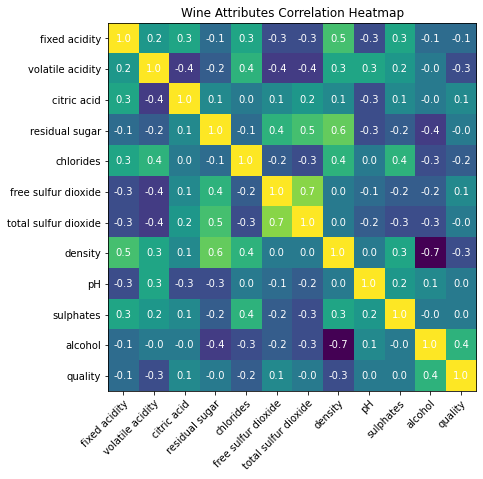

In [89]:
# Wine Attributes Correlation Heatmap

wines_colums = ["fixed acidity", "volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
wines_corr = np.around(wines.corr(method='pearson', min_periods=1).to_numpy(), decimals=1)

fig, ax = plt.subplots()
im = ax.imshow(wines_corr)

# We want to show all ticks...
ax.set_xticks(np.arange(len(wines_colums)))
ax.set_yticks(np.arange(len(wines_colums)))
# # ... and label them with the respective list entries
ax.set_xticklabels(wines_colums)
ax.set_yticklabels(wines_colums)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(wines_colums)):
    for j in range(len(wines_colums)):
        text = ax.text(j, i, wines_corr[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Wine Attributes Correlation Heatmap")
fig.tight_layout()
fig.set_figheight(100)
plt.show()


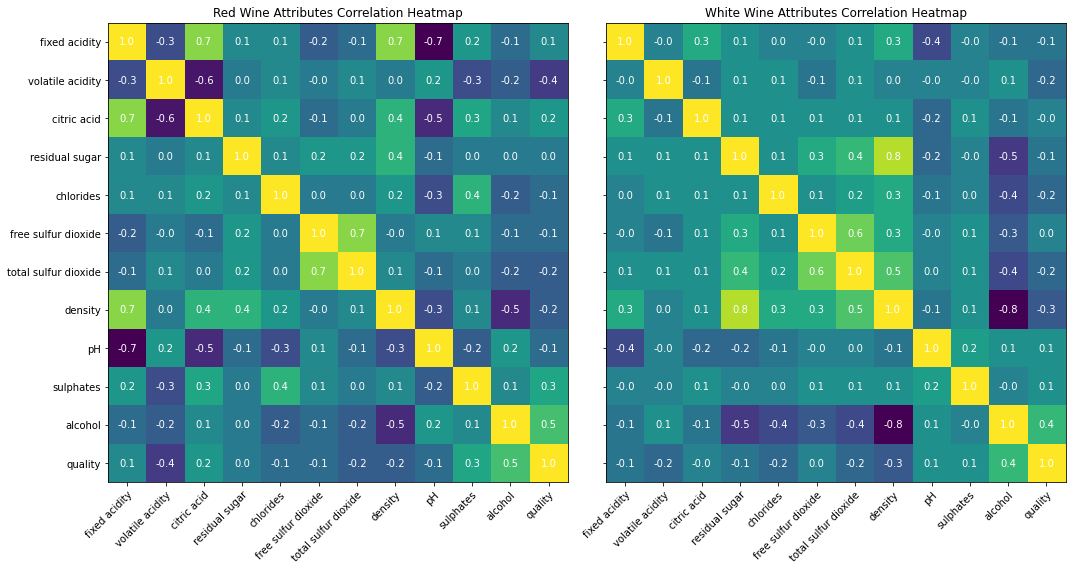

In [90]:
# Comparative Attributes Correlation Heatmap - Red/White
 
wines_colums = ["fixed acidity", "volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
red_corr = np.around(red_df.corr(method='pearson', min_periods=1).to_numpy(), decimals=1)
white_corr = np.around(white_df.corr(method='pearson', min_periods=1).to_numpy(), decimals=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

im1 = ax1.imshow(red_corr)
ax1.set_xticks(np.arange(len(wines_colums)))
ax1.set_yticks(np.arange(len(wines_colums)))
ax1.set_xticklabels(wines_colums)
ax1.set_yticklabels(wines_colums)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(wines_colums)):
    for j in range(len(wines_colums)):
        text = ax1.text(j, i, red_corr[i, j],
                       ha="center", va="center", color="w")
ax1.set_title("Red Wine Attributes Correlation Heatmap")

im2 = ax2.imshow(white_corr)
ax2.set_xticks(np.arange(len(wines_colums)))
ax2.set_yticks(np.arange(len(wines_colums)))
ax2.set_xticklabels(wines_colums)
ax2.set_yticklabels(wines_colums)
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(wines_colums)):
    for j in range(len(wines_colums)):
        text = ax2.text(j, i, white_corr[i, j],
                       ha="center", va="center", color="w")
ax2.set_title("White Wine Attributes Correlation Heatmap")



fig.tight_layout()
#fig.set_figheight(100)
plt.show()

In [91]:
# ML Model Setup

# Relevant Variables according Data Exploring:
# 1. Residual Sugar
# 2. Density
# 3. Alcohol
# 4. Free SO2

# Models:
# 1. Linear Regretion
# 2. KNN

# Treat Data:
# 1. Split data --> Train vs Test
# 2. Scale data: Robust scaler (with outliers)

# ML Application
# 1. Red/White Predition --> R/W
# 2. Label Prediction
# 3. Class Prediction


In [101]:
# 1. Split Data R/W

# from sklearn.model_selection import train_test_split
# from collections import Counter

X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=wines.wine_type)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))


Counter({'white': 3428, 'red': 1119}) Counter({'white': 1470, 'red': 480})
Features: ['residual sugar', 'free sulfur dioxide', 'density', 'alcohol']


In [102]:
# 2. Scale Data

#from sklearn.preprocessing import RobustScaler

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)


In [100]:
# Model: Linear Regretion R/W

#from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)



LogisticRegression()

In [103]:
# Prediction R/W

pred_wines_rw_lr= wines_rw_lr.predict(X_test)
print(pred_wines_rw_lr.shape) #checking the shape of between Target and Test
print(y_test.shape)

(1950,)
(1950,)


In [104]:
# Results R/W Linear Regretion with Calssification Report + Confution Matrix + Cohen-Kappa Score

# from sklearn.metrics import classification_report

print(classification_report(y_test,pred_wines_rw_lr, target_names=['red', 'white']))

print(confusion_matrix(y_test,pred_wines_rw_lr))

print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_rw_lr))*100, "%")




              precision    recall  f1-score   support

         red       0.94      0.96      0.95       480
       white       0.99      0.98      0.98      1470

    accuracy                           0.97      1950
   macro avg       0.96      0.97      0.97      1950
weighted avg       0.98      0.97      0.97      1950

[[ 459   21]
 [  28 1442]]
Percentage of accurancy of the model with Cohen-Kappa score is:  93.2622538131201 %


In [105]:
# Model: KNN R/W

#from sklearn.neighbors import KNeighborsClassifier

X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=wines.wine_type)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

pred_wines_rw_neigh= knn.predict(X_test)

print(pred_wines_rw_neigh.shape)
print(y_test.shape)


Counter({'white': 3428, 'red': 1119}) Counter({'white': 1470, 'red': 480})
Features: ['residual sugar', 'free sulfur dioxide', 'density', 'alcohol']
(1950,)
(1950,)


In [106]:
# Results R/W KNN with Calssification Report + Confution Matrix + Cohen-Kappa Score

print(classification_report(y_test,pred_wines_rw_neigh, target_names=['red', 'white']))
print(confusion_matrix(y_test,pred_wines_rw_neigh))
print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_rw_neigh))*100, "%")



              precision    recall  f1-score   support

         red       0.94      0.95      0.95       480
       white       0.98      0.98      0.98      1470

    accuracy                           0.97      1950
   macro avg       0.96      0.97      0.96      1950
weighted avg       0.97      0.97      0.97      1950

[[ 456   24]
 [  29 1441]]
Percentage of accurancy of the model with Cohen-Kappa score is:  92.70204427497087 %


In [99]:
#%reset